In [55]:
%matplotlib inline 
import numpy as np
import pandas as pd
import nibabel as nib 
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
# The lesion's intersection with each LNM was also quantified as the sum of voxel intensities from a lesion network map that also appeared within the boundaries of a
#  given patient's lesion mask. For the network maps there was no equivalent eigenvalue used in the LBMs. The resulting ‘lesion load’ 
# values are referred to as structural LNM-LL for the structural LNMs, and functional LNM-LL for the functional LNMs (Fig. 1). We focused on lesion
#  load values for the PC maps where possible. For PC maps with positive and negative values, we created two separate lesion load values in order to avoid
#  potential problems with summing both positive and negative voxels into a single scor∏e (Bowren et al., 2022)


df=pd.read_table('~/GIT/ENIGMA/data/Behaviour_Information_ALL_April7_2022_sorted_CST_12_ll.csv', header=0, delimiter=',')
sub_left=df['LESIONED_HEMISPHERE']


In [ ]:

# calculate lesion load for each subject and append to growing table
slnm_dir= '/Users/emilyolafson/GIT/ENIGMA/enigma_predictions/local_code/sLNM_maps/'
pc1 = nib.load(os.path.join(slnm_dir, 'fm_slnm_pc1.nii.gz')).get_fdata()
pc2_pos = nib.load(os.path.join(slnm_dir, 'fm_slnm_pc2_pos.nii.gz')).get_fdata()
pc2_neg = nib.load(os.path.join(slnm_dir, 'fm_slnm_pc2_neg.nii.gz')).get_fdata()
pc3_pos = nib.load(os.path.join(slnm_dir, 'fm_slnm_pc3_pos.nii.gz')).get_fdata()
pc3_neg = nib.load(os.path.join(slnm_dir, 'fm_slnm_pc3_neg.nii.gz')).get_fdata()

lesion_folder = '/Users/emilyolafson/GIT/ENIGMA/data/lesionmasks/all_lesionmasks_2009tov6_usingSym_rename/'

colnames = ['PC1', 'PC2_1','PC2_2','PC3_1','PC3_2']

# using original PC maps
sub_vecs=np.empty(shape=(0, 5))
                  
for sub in range(0,len(df)):
    lesion = nib.load(lesion_folder+  df.loc[df.index[sub],'BIDS_ID']+'.nii.gz').get_fdata()

    PC1_sub=np.sum(lesion*pc1)
    PC2_1_sub=np.sum(lesion*pc2_pos)
    PC2_2_sub=np.sum(lesion*pc2_neg)
    PC3_1_sub=np.sum(lesion*pc3_pos)
    PC3_2_sub=np.sum(lesion*pc3_neg)

    subvec=[PC1_sub, PC2_1_sub, PC2_2_sub, PC3_1_sub, PC3_2_sub]
    sub_vecs=np.append(sub_vecs, np.reshape(subvec, [1, 5]), axis=0)

slnmvalues = pd.DataFrame(columns=colnames, data = sub_vecs)
slnmvalues['Motor score']=np.transpose(df['NORMED_MOTOR'].values)
slnmvalues.to_csv('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/slnmvalues.csv')
df=pd.concat((df,slnmvalues),axis=1)

df.to_csv('~/GIT/ENIGMA/data/Behaviour_Information_ALL_April7_2022_sorted_CST_12_ll_slnm.csv')

In [53]:
pc1 = nib.load(os.path.join(slnm_dir, 'fm_slnm_pc1.nii.gz')).get_fdata()
print(np.sum(pc1))
pc1_zerod = nib.load(os.path.join(slnm_dir, 'fm_slnm_pc1_test2.nii.gz')).get_fdata()
print(np.sum(pc1_zerod))

pc2 = nib.load(os.path.join(slnm_dir, 'fm_slnm_pc2_neg.nii.gz')).get_fdata()
print(np.sum(pc2))
pc2_zerod = nib.load(os.path.join(slnm_dir, 'fm_slnm_pc2_neg_test2.nii.gz')).get_fdata()
print(np.sum(pc2_zerod))

pc3 = nib.load(os.path.join(slnm_dir, 'fm_slnm_pc3_neg.nii.gz')).get_fdata()
print(np.sum(pc3))
pc3_zerod = nib.load(os.path.join(slnm_dir, 'fm_slnm_pc3_neg_test2.nii.gz')).get_fdata()
print(np.sum(pc3_zerod))

-0.005091739760246128
532842.7536258791
-421917.54522029846
-69546.82465950027
-441137.969175969
-28694.59433324635


In [54]:
# using updated lesion maps (zero'd out non-WM voxels that previously had small non-zero negative value)

slnm_dir= '/Users/emilyolafson/GIT/ENIGMA/data/sLNM_maps/'
pc1 = nib.load(os.path.join(slnm_dir, 'fm_slnm_pc1_test2.nii.gz')).get_fdata() # everything <= -0.07635655 set to 0
pc2_pos = nib.load(os.path.join(slnm_dir, 'fm_slnm_pc2_pos.nii.gz')).get_fdata()
pc2_neg = nib.load(os.path.join(slnm_dir, 'fm_slnm_pc2_neg_test2.nii.gz')).get_fdata() # everything >= -0.05204881 set to 0
pc3_pos = nib.load(os.path.join(slnm_dir, 'fm_slnm_pc3_pos.nii.gz')).get_fdata()
pc3_neg = nib.load(os.path.join(slnm_dir, 'fm_slnm_pc3_neg_test2.nii.gz')).get_fdata()  # everything >= -0.06 set to 0


# calculate lesion load for each subject and append to growing table

# using original PC maps
sub_vecs=np.empty(shape=(0, 5))
                  
for sub in range(0,len(df)):
    lesion = nib.load(lesion_folder+  df.loc[df.index[sub],'BIDS_ID']+'.nii.gz').get_fdata()

    PC1_sub=np.sum(lesion*pc1)/np.sum(pc1)
    PC2_1_sub=np.sum(lesion*pc2_pos)/np.sum(pc2_pos)
    PC2_2_sub=np.sum(lesion*pc2_neg)/np.sum(pc2_neg)
    PC3_1_sub=np.sum(lesion*pc3_pos)/np.sum(pc3_pos)
    PC3_2_sub=np.sum(lesion*pc3_neg)/np.sum(pc3_neg)

    subvec=[PC1_sub, PC2_1_sub, PC2_2_sub, PC3_1_sub, PC3_2_sub]
    sub_vecs=np.append(sub_vecs, np.reshape(subvec, [1, 5]), axis=0)

slnmvalues_zeroed = pd.DataFrame(columns=colnames, data = sub_vecs)
slnmvalues_zeroed['Motor score']=np.transpose(df['NORMED_MOTOR'].values)
slnmvalues_zeroed.to_csv('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/slnmvalues_zeroed.csv')


In [56]:
df=pd.concat((df,slnmvalues_zeroed),axis=1)

df.to_csv('~/GIT/ENIGMA/data/Behaviour_Information_ALL_April7_2022_sorted_CST_12_ll_slnm_zeros.csv')
df

,BIDS_ID,SES,SITE,AGE,SEX,DAYS_POST_STROKE,CHRONICITY,CHRONIC,ACUTE,LESIONED_HEMISPHERE,...,R_PMv_CST,R_S1_CST,R_SMA_CST,R_preSMA_CST,PC1,PC2_1,PC2_2,PC3_1,PC3_2,Motor score
0,sub-r001s001,ses-1,r001,61.0,2.0,471.0,180.0,1,0,2.0,...,0.541656,0.010315,0.028453,0.052155,0.035979,0.001990,0.443540,0.370642,0.017791,0.636364
1,sub-r001s002,ses-1,r001,53.0,2.0,669.0,180.0,1,0,2.0,...,0.048664,0.000000,0.014622,0.009607,0.056729,0.000449,0.177627,0.134275,0.018824,0.742424
2,sub-r001s003,ses-1,r001,67.0,2.0,709.0,180.0,1,0,2.0,...,0.022745,0.000175,0.051176,0.076585,0.001817,0.002814,0.001352,0.005756,0.000084,0.742424
3,sub-r001s004,ses-1,r001,51.0,1.0,871.0,180.0,1,0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000618,0.152489,0.000100,0.022282,0.001936,0.515152
4,sub-r001s005,ses-1,r001,54.0,2.0,1917.0,180.0,1,0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000360,0.234674,0.004645,0.039576,0.002588,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,sub-r054s008,ses-1,r054,80.0,2.0,6.0,90.0,0,1,2.0,...,0.038350,0.018881,0.030626,0.000000,0.035908,0.003451,0.011981,0.012460,0.014149,0.893939
1064,sub-r054s009,ses-1,r054,69.0,2.0,13.0,90.0,0,1,2.0,...,0.050780,0.055070,0.068168,0.073017,0.003974,0.004297,0.080352,0.071475,0.002230,0.878788
1065,sub-r054s010,ses-1,r054,65.0,2.0,13.0,90.0,0,1,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000211,0.321825,0.000645,0.050434,0.001459,0.060606
1066,sub-r054s011,ses-1,r054,71.0,2.0,14.0,90.0,0,1,2.0,...,0.000000,0.011713,0.000000,0.000000,0.020749,0.000415,0.004233,0.003299,0.035133,0.909091


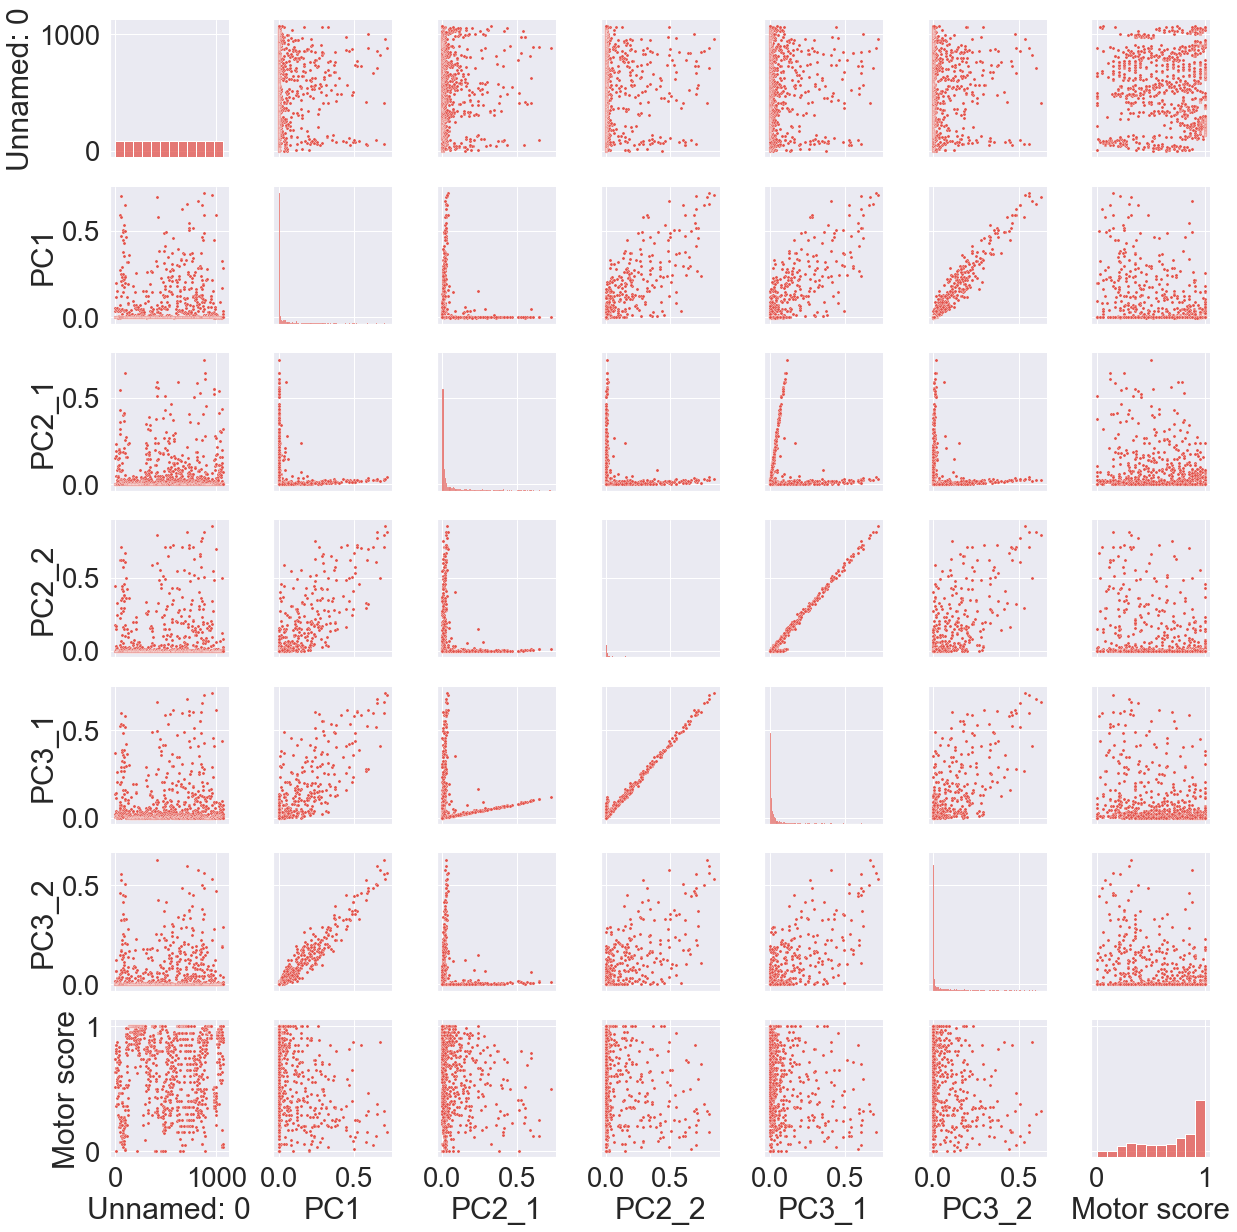

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
slnmvalues.to_csv('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/slnmvalues_zeroed.csv',index=0)
sns.set(font_scale=2.5)
sns.set_palette('Spectral')
sns.pairplot(slnmvalues,plot_kws={"s": 10})
plt.savefig('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/slnmvalues_scatterplts.png')

,Unnamed: 0,PC1,PC2_1,PC2_2,PC3_1,PC3_2,Motor score
0,0,0.035979,0.001990,0.443540,0.370642,0.017791,0.636364
1,1,0.056729,0.000449,0.177627,0.134275,0.018824,0.742424
2,2,0.001817,0.002814,0.001352,0.005756,0.000084,0.742424
3,3,0.000618,0.152489,0.000100,0.022282,0.001936,0.515152
4,4,0.000360,0.234674,0.004645,0.039576,0.002588,0.666667
...,...,...,...,...,...,...,...
1063,1063,0.035908,0.003451,0.011981,0.012460,0.014149,0.893939
1064,1064,0.003974,0.004297,0.080352,0.071475,0.002230,0.878788
1065,1065,0.000211,0.321825,0.000645,0.050434,0.001459,0.060606
1066,1066,0.020749,0.000415,0.004233,0.003299,0.035133,0.909091


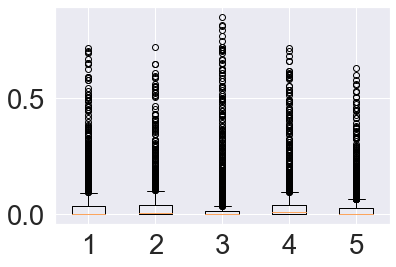

In [58]:
slnmvalues = pd.read_csv('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/slnmvalues_zeroed.csv')

mean_LL = np.mean(slnmvalues.iloc[:,0:5],axis=0)

plt.boxplot(slnmvalues.iloc[:,1:6])

slnmvalues